# Python Tree
```Inheritance of tree
st=>start: Start
e=>end
op=>operation:My Operation
cond=>condition:Yes or No?

```
Question about Nested class & about the call for function _height1 

In [4]:
class Tree:
    """Abstract base class representing a tree structure."""
    
    ###### Nested Position class
    class Position:
        """An abstract representing the location of a single element."""
        
        def element(self):
            """Return the element stored at this Position."""
            raise NotImplementedError('must be implemented by subclass')
            
        def __eq__(self, other):
            """Return Ture if other Position represents the same location."""
            raise NotImplementedError('must be implemented by subclass')
            
        def __ne__(self, other):
            """Return True if other does not represent the same location."""
            return not (self == other)
        
    #::::::: abstract methods that concrete subclass MUST support
    def root(self):
        """Return Position representing the tree's root (or None if empty)."""
        raise NotImplementedError('must be implemented by subclass')
            
    def parent(self,p):
        """Return Position representing p's parent (or None if p is root)."""
        raise NotImplementedError('must be implemented by subclass')
            
    def num_children(self,p):
        """Return the number of children that Position p has."""
        raise NotImplementedError('must be implemented by subclass')
        
    def children(self,p):
        """Generate an iteration of Positions representing p's children."""
        raise NotImplementedError('must be implemented by subclass')
            
    def __len__(self):
        """Return the total number of elements in the tree."""
        raise NotImplementedError('must be implemented by subclass')
        
    def positions(self):
        #TODO: To implement the positions meth, we have a choice of tree traversal algorithms.
        # Given that there are advantages to each of those of those traversal orders, we will
        # provide independent implementations of each strategy 
        # thtat can be called directly by a user of our class.
        # we can then rivially adapt one of those as a default order for the positions method
        # of the this tree
        """Return the an iteration of all positions of tree """
        #return self.preorder()
        #return self.postorder()
        #return self.inorder()
        raise NotImplementedError('must be implemented by subclass')
    
    def __iter__(self):
        #TODO: rely on a presumed iteration of all positions.
        """Return an iteration of the tree's elements."""
        raise NotImplementedError('must be implemented by subclass')
        
    #::::::: concrete methods implemented in this class
    def is_root(self,p):
        """Return True if Position p reppresents the root of the tree."""
        return self.root() == p
        
    def is_leaf(self,p):
        """Return Ture if Position p does not have any children."""
        return self.num_children(p) == 0
        
    def is_empty(self):
        """Return True if the tree is empty."""
        #TODO: Mark it.
        return len(self) == 0 
        
    def depth(self, p):
        """Return the number of levels separating Position p from the root."""
        if self.is_root(p):
            return 0
        else: 
            return 1+self.depth(self.parent(p))
            
    def _height1(self): # works, but O(n^2) worst-case time
        return max(self.depth(p) for p in self.positions() if self.is_leaf(p))
    
    def _height2(self): # time is linear in size of subtree
        """Return the height of the subtree rooted at Position p."""
        if self.is_leaf(p):
            return 0
        else:
            return 1 + max(self._height2(c) for c in self.children(p))
        
    def height(self, p=None):
        if p is None:
            p = self.root()
        return self._height2(p)
    
    #------Tree Traversal Algorithms
    def preorder(self):
        """Generate a preorder iteration of positions in the tree."""
        if not self.is_empty():
            for p in self._subtree_preorder(self.root()):   #start recursion
                yield p
    def _subtree_preorder(self,p):
        """Generate a preorder iteration of positions in subtree rooted at p."""
        yield p
        for c in self.children(p):                           #children func return left first.
            for other in self._subtree_preorder(c): 
                yield other         
                

        
    def postorder(self):
        if not self.is_empty():
            for p in self._subtree_postorder(self.root()):
                yield p
    def _subtree_postorder(self,p):
        """Generate a preorder iteration of positions in the tree."""
        for c in self.children(p):
            for other in self._subtree_postorder(c):
                yield other
        yield c
    def breadthfirst(self):
        """Generate a breath-first iteration of the position of the tree."""
        if not self.is_empty():
            fringe = LinkedQueue()
            fringe.enqueue(self.root())
            while (not fringe.is_empty()):
                p = fringe.dequque()
                yield p
                for c in self.children(p):
                    fringe.enqueue(c)

In [6]:
class BinaryTree(Tree):
    """ Abstract base class representing a binary tree structure."""
    
    # ------- additional abstract methods
    def left(self, p):
        """Return a Position representing p's left child.
        
        Return None if p does not have a left child.
        """
        raise NotImplementedError('must be implemented by subclass')
        
    def right(self,p):
        """Return a Position representing p's right child.
        
        Return None if p does not have a right child.
        """
        raise NotImplementedError('must be implemented by subclass')
        
    ############# concrete methods implemented in this class
    def sibling(self,p):
        """Return a Position representing p's sibling (or None if no sibling)."""
        parent = slef.parent(p)
        if parent is None:
            return None
        else:
            if p == self.left(parent):
                return self.right(parent)
            else:
                return self.left(parent)
            
    def children(self,p):
        """Generate an iteration of Positions representing p's children."""
        if self.left(p) is not None:
            yield self.left(p)
        if self.right(p) is not None:
            yield self.right(p)
            
    def inorder(self):
        """Generate a inorder iteration of positions in the tree."""
        if not self.is_empty():
            for p in self._subtree_inorder(self.root()):
                yield p
    def _subtree_inorder(self,p):
        """Generate an inorder iteration of position in subtree rooted at p."""
        if self.left(p) is not None:
            for other in self._subtree_inorder(self.left(p)):
                yield other
        yield p
        if self.right(p) is not None:
            for other in self._subtree_inorder(self.right(p)):
                yield other

In [7]:
class LinkeBinaryTree(BinaryTree):
    """Linked representation of a binary tree structure."""
    
    class _Node:      # Lightweight, nonpublic class for storing a node.
        __slots__='_element','_parent','_left','_right'
        def __init__(self, element,parent=None, left=None, right=None):
            self._element = element
            self._parent = parent
            self._left = left
            self._right = right
            
    class Position(BinaryTree.Position):
        """An absttaction representing the location of a single element."""
        
        def __init__(self, container, node):
            """Constructor should not be invoked by user."""
            self._container = container
            self._node = node
        
        def element(self):
            """Return the element stored at this Position."""
            return self._node._element
        
        def __eq__(self,other):
            """Return True if other is a Position representing the same location."""
            return type(other) is type(self) and other._node is self._node
    ##----------- utility method
    def _validate(self, p):
        """Return associated node, if position is valid."""
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._parent is p._node:  # convention for deprecated nodes
            raise ValueError('p is no longer valid')
        return p._node
        
    def _make_position(self, node):
        """Return Position instance for given node (or None if no node)."""
        return self.Position(self, node) if node is not None else None
        
    #---------------- binary tree constructor --------------------
    def __init__(self):
        """Create an initially empty bianry tree."""
        self._root = None
        self._size = 0
            
    #----------------- public accessors -----------------------
    def __len__(self):
        """Return the total number of elements in the tree."""
        return self._size
        
    def root(self):
        """Return the root Position of the tree ( or None if tree is empty)."""
        return self._make_position(self._root)
        
    def parent(self, p):
        """Return the Position of p's parent (or None if p is root)."""
        node = self._validate(p)
        return self._make_position(node._parent)
    
    def left(self,p):
        """Return the Position of p's left child (or None if no left child)."""
        node = self._validate(p)
        return self._make_position(node._left)
    def right(self,p):
        """Return the Position of p's right child ( or None if no left child)."""
        node  = self._validate(p)
        return self._make_position(node._right)
    
    def num_children(self,p):
        """Return the number of children of Position p."""
        node = self._validate(p)
        ret = 0
        if node._right is not None:
            ret += 1
        if node._left is not None:
            ret += 1
        return ret
    
    def _add_root(self,e):
        """Place element e at the root of an empty tree and return new Position.
        
        Raise ValueError if tree nonempty.
        """
        if self._root is not None:
            raise ValueError('Root exists')
        self._size = 1
        self._root = self._Node(e)
        return self._make_position(self._root)
    
    def _add_left(self,p,e):
        """Create a new left child for Postion p, storing element e.
        
        Return the Position of new node.
        Raise ValueError is Position p is invalid or p already has a left child.
        """
        node = self._validate(p)
        if node._left is not None:
            raise ValueError('left child exists.')
        node._left = self._Node(e,node)
        self._size += 1
        return self._make_position(node._left)
    
    def _add_right(self,p,e):
        """Create a new right child for Position p, storing element e.
        
        Return the Position of new node.
        Raise ValueError is Position p is invalid or p already has left child.
        """
        node = self._validate(p)
        if node._right is not None:
            raise ValueError('Right child exists.')
        node.right = self._Node(e,node)
        self._size += 1
        return self._make_position(node._right)
    
    def replace(self,p,e):
        """Replace the element with e of the Position p.
        
        Return the old element.
        Raise ValueError is Position p is invalid .
        """
        node = self._validate(p)
        old = node._element
        node._element = e
        return old
    
    def _delete(self, p):
        """Delete the node at Position p, and replace it with its child, if any.
        
        Return the element that had been stored at Position p.
        Raise ValueError if Position p is invalid or p has two children.
        """
        node = self._validate(p)
        if self.num_children(p) == 2: raise ValueError('p has two children')
        child = node._left if node._left else node._right # might be None
        if child is not None:
            child._parent = node._parent
        if node is self._root:
            self.root=child
        else:
            parent = node._parent
            if node is parent._left:
                parent._left = child
            else:
                parent._right = child
        self.size -=1
        node._parent=node    # convention for deprecated node
        return node.element
    
    def _attach(self,p,t1,t2):
        """Attach trees t1 and t2 as left and right subtrees of external p.
        
        Raise ValueError if Position p is not leaf.
        Raise TypeError if self, t1, t2 not the same type.
        """
        node = self._validate(p)
        if not self.is_leaf(p): raise ValueError('position must be leaf')
        if not type(self) is type(t1) is type(t2):    # all 3 tree must be same type.
            raise TypeError('Tree types must match')
        self._size += len(t1) + len(t2)
        if not t1.is_empty():
            t1._root._parent = node
            node._left = t1._root
            t1._root = None
            t1._size = 0
        if not t2.is_empty():
            t2._root._parent = node
            node._right = t2._root
            t2._root_ = None
            t2._size = 0
        pass

### Case Study: Application of Tree
#### Euler Tour traversal of Tree with Template Methed Pattern
The Euler tour traversal of a general tree T can be informally defined as a "walk" around T,
where start by going from the root toward its leftmost child, viewing the edges of T as being "walls" that we always keep to our left.
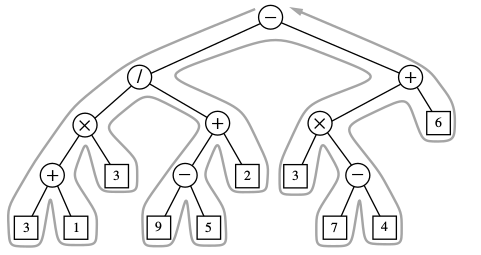
Algorithm eulertour(T,p):
    perform the "pre visit" action for positon p 
    for each child in T.children(p) do 
        eulertour(T,c)
    perform the "post visit" action for position p

In [2]:
class EulerTour:
    """Abstract base class for performing Euler tour of a tree. 
    
    _hook_previsit and _hook_postvisit may be overridden by subclasses.
    """
    def __init__(self, tree):
        """Prepare an Euler tour template for given tree."""
        self._tree = tree
        
    def tree(self):
        """Return reference to the tree being traversed."""
        return self._tree
    def execute(self):
        """Perform the tour and return any result from post visit of root."""
        if len(self._tree) > 0:
            return self._tour(self._tree.root(), 0, [])
        
    def _tour(self, p, d, path):
        """Perform tour of subtree rooted at Position p.
        
        p        Position of current node being visited
        d        depth of p in the tree
        path     list of indices of children on path from root to p
        """
        self._hook_previsit(p,d,path)
        results = []
        path.append(0)
        for c in self._tree.children(p):
            result.append(self._tour(c,d+1,path))
            path[-1] += 1
        path.pop()
        answer = self._hook_postvisit(p,d,path,results)
        return answer
    
    def _hook_previsit(self,p,d,path):
        pass
    def _hook_postvisit(self,p,d,path,results):
        pass


In [ ]:
#--------subclass of Euler Tour that produces an indented preorder list of a tree's elements.
class PreorderPrintIndentedTour(EulerTour):
    def _hook_previsit(self, p, d, path):
        print(2*d*' ' + str(p.element()))
        

### The Euler Tour Traversal of a Binary Tree

Class BinaryEulerTour replaces the original *_tour* utility to specialize to the case in which a node has at most two children. if a node has only one child. a tour differentiates between whether that is  a left child or a right child, with the "in visit" taking place after the visit of a sole left child, but before the visit for a sole right child. In the case of a lef, the three hooks are called in succession.

In [3]:
class BinaryEulerTour(EulerTour):
    """Abstract base class for performing Euler tour of a binary tree.
    
    This version includes an additional _hook_invisit that is called after the tour
    of the left subtree (if any), yet before the tour of the right subtree (if any).
    
    Note: Right child is always assigned index 1 in path even if no left sibling.
    """
    def _tour(self,p,d,path):
        results = [None,None]
        self._hook_previsit(p,d,path)
        if self._tree.left(p) is not None:
            path.append(0)
            results[0] = self._tour(self._tree.left(p), d+1, path)
            path.pop()
        self._hook_invisit(p,d,path)
        if self._tree.right(p) is not None:
            path.append(1)
            results[1] = self._tour(self._tree.right(p), d+1, path)
            path.pop()
        answer =  self._hook_postvisit(p,d,path,result)
        return answer
    
    def _hook_invisit(self,p,d,path): pass

class BinaryLayout(BinaryEulerTour):
    """Class for computing (x,y) coordinates for each node of a binary tree."""
    def __init__(self, tree):
        super().__init__(tree)        # must call the parent constructor
        self._count = 0               # initialize count of processed nodes.
    
    def _hook_invisit(self,p,d,path):
        p.element().setX(self._count)    # x-oordinate serialized by count
        p.element().setY(d)              # y-coordinate is depth
        self._count += 1                 # advance count of processed nodes

#### Case Study: An Expression Tree
Eventual goal is to build arbitrarily complex expression tree for compound arithmetic expressions such as (((3 + 1) x 4)/((9-5) +2)).
However, it suffices for the Expression Tree class to support two basic forms of initialization:
**ExpressionTree(value):** Create a tree storing the given value at the root.  
**ExpressionTree(op,E<sub>1</sub>,E<sub>2</sub>):** Create a tree storing string _op_ at the
root (e.g. +), and with the structures of existing ExpressionTree instances _E<sub>1</sub>_ and _E<sub>2</sub>_ as the left and right subtrees of the root, respectively.  
**\__str\__:** It is more efficient to first build a sequence of individual strings to be joined together. return appropriate string. relies on a nonpublic,recursive methods named \_parenthesize_recur that appends a series of strings to a list.　　
**evaluate:** The numeric evaluation of an expression tree can be accomplished with a simple application of a postorder traversal.  
　　　　"""  
　　　　**Algorithm** evaluate_recur(p):  
　　　　　　**if** p is a leaf **then**  
　　　　　　　　**return** the value stored at p  
　　　　　　**else**  
　　　　　　　　let ◦ be the operator stored at p  
　　　　　　　　x = evaluate_recur(left(p))  
　　　　　　　　y = evaluate_recur(right(p))  
　　　　　　　　**return** x ◦ y  
　　　　"""
###### Building an Expression Tree
How to construct a tree that represents an expression for a given string.

In [ ]:
class ExpressionTree(LinkedBinaryTree):
    """An arithmetic expression tree."""
    def __init__(self, token, left=None, right=None):
        """Creat an expression tree.
        
        In a signle parameter form, token should be a leaf value (e.g. '42'),
        and the expression tree will have that value at an isolated node.
        
        In a three parameter version, token should be an operator, and left and right should be 
        existing ExpressionTree instances that become the operands for the binary operator.
        """
        super().__init__()
        if not isinstance(token, str):
            raise TypeError('Token must be a string')
        self._add_root(token)                      # use inherited, nonpublic
        if left is not None:                       # presumably three-parameter form
            if token not in '+-*x/':
                raise ValueError('token must be valid operator')
            self._attach(self.root(),left,right)    # use inherited, nonpublic method
    def __str__(self):
        """Return string representation of the expression."""
        pieces = []                             # sequence of piecewise strings to compose
        self._parenthesize_recur(self.root().pieces)
        return ''.join(pieces)
    
    def _parenthesize_recur(self, p, result):
        """Append piecewise representation of p's subtree to resulting list."""
        if self.is_leaf(p):
            result.append(str(p.element()))  # leaf value as a string
        else:
            result.append('(')
            self._parenthesize_recur(self.left(p), result)
            result.append(p.element())
            self._parenthesize_recur(self.right(p), result)
            result.append(')')                # closing parenthesis
            
    def evaluate(self):
        """Return the numeric result of the expression."""
        return self._evaluate_recur(self.root())
    
    def _evaluate_recur(self,p):
        """Return the numeric result of subtree rooted at p."""
        if self.is_leaf(p):
            return float(p.element())      # we assume element is numeric
        else:
            op = p.element()
            left_val = self._evaluate_recur(self.left(p))
            right_val = self._evaluate_recur(self.right(p))
            if op == '+': return left_val + right_val
            elif op == '-': return left_val - right_val
            elif op == '/': return left_val / right_val
            else: return left_val * right_val        # treat 'x' or '*' as multiplication.
    def build_expression_tree(tokens):
        """Return an Expression Tree based upon a tokenized expression."""
        S = []
        for t in tokens:
            if t in '+-x*/':
                S.append(t)
            elif t not in '()':
                S.append(ExpreesionTree(t))
            elif t == ')':
                right = S.pop()
                op = S.pop()
                left = S.pop()
                S.append(ExpressionTree(op,lef,right))
            # we ignore a left parenthesis
            return S.pop()

### TODO
1.Euler Tour  
2.WhiteBorad Implamentation.

## To Be Continued: Binary Search Tree.
Firstly, some classes needed.
Secondly, binary search tree.

In [ ]:
class MutableMapping:
    class _Item:
        pass
    pass
class MapBase(MutableMapping):
    """Our own abstract base class that includes a nonpublic _Item class."""
    class _Item:
        """Lightweight composite to store key-value pairs as map items."""
        __slots__='_key', '_value'
    
        def __init__(self,k,v):
            self._key = k
            self._value = v
        
        def __eq__(self,other):
            return self._key == other._key    # compare items based on their keys
        
        def __ne__(self,other):
            return not (self == other)        # opposite of __eq__
        def __It__(self,other):
            return self._key < other._key
class UnsortedTableMap(MapBase):
    """Map implementation using an unordered list."""
    
    def __init__(self):
        """Create an empty map."""
        self._table = []
        
    def __getitem__(self,k):
        """Return value associated with key k (raise KeyError if not found)."""
        for item in self._table:
            if k == item._value:
                return item._value
        raise KeyError('Key Error: ' + repr(k))
    
    def __setitem__(self, k, v):
        """Assign value v to key k, overwriting existing value if present."""
        for item in self._table:
            if k == item._key:
                item._value = v
                return
        # did not find match for key
        self._table.append(self._Item(k,v))
        
    def __delitem__(self,k):
        """Remove item associated with key k (raise KeyError if not found)."""
        for j in range(len(self._table)):
            if k == self._table[j]._key:
                self._table.pop(j)
                return
        raise KeyError('Key Error: '+ repr(k))  #repr : object's representation.
    
    def __len__(self):
        """Return number of items in the map."""
        return len(self._table)
    
    def __iter__(self):
        """Generate iteration of the map's keys."""
        for item in self._table:
            yield item._key                     # yield the KEY
            

## Binary Search Trees Implementation
 _TreeMap_ takes advantaage of **multiple inheritance** for code reuse, inheriting from the _LinkedBinaryTree_ for representation as a positional binary tree, and from the _MapBase_ class for the key-value composite item and the concrete behaviors form the collections. The nested _Position_ class to support more speciifc p.key() and p.value() accessors for our map, rather than the p.element() syntax inherited from the tree ADT.
 

In [ ]:
class TreeMap(LinkedBinaryTree, MapBase):
    """Sorted map implementation using a binary search tree."""
    ### overide nested class Postion
    class Positon(LinkedBinaryTree.Positon):
        def key(self):
            """Return key of map's key-value pair"""
            return self.element()._key
        
        def value(self):
            """Return value of map's key-value pair."""
            return self.element()._value
        
    ###-------- nonpublic utilites
    def _subtree_search(self,p,k):
        """Return Position of p's subtree having key k, or last node searched."""
        if k == p.key():
            return p
        elif k < p.key():
            if self.left(p) is not None:
                return self._subtree_search(self.left(p),k)
        else :
            if self.right(p) is not None:
                return self._subtree_search(self.right(p),k)
        return p    # unsucessful search
    
    def _subtree_first_postion(self,p):
        """Return Postion of first item in subtree rooted at p."""
        walk = p
        while self.left(walk) is not None:
            walk = self.left(walk)
        return walk
    
    def _subtree_last_postion(self,p): #WTF?
        """Return Postion of last item in subtree rooted at p."""
        walk = p
        while self.right(walk) is not None:
            walk = sel.right(walk)
        return walk
    
    ##----------------------- concrete method
    def first(self):
        """Return the first Postion in the tree (or None if empty)."""
        return self._subtree_first_position(self.root()) if len(self) > 0 else None
    def last(self):
        """Return the last Postiion in the tree (or None if empty)."""
        return self._subtree_last_position(self.root()) if len(self) > 0 else None
    